In [1]:
import pandas as pd
from sklearn.datasets import make_classification
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.callbacks import EarlyStopping
#import plotly.express as px
from keras.layers import Dense,Dropout,Conv1D,MaxPooling1D,Flatten,BatchNormalization
from tensorflow.keras import layers,initializers
from keras.callbacks import LearningRateScheduler
from keras.callbacks import History
from keras import losses
#from livelossplot import PlotLossesKeras
from keras.callbacks import EarlyStopping

In [2]:
#pip install livelossplot

In [3]:
x,y=make_classification(n_samples=10000,n_features=100,n_informative=5,n_redundant=15,random_state=1)

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [5]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(7500, 100) (7500,)
(2500, 100) (2500,)


# **WITHOUT REGULARISATION**

In [6]:
model=Sequential()
initializer=tf.keras.initializers.GlorotUniform() #Xavier intialiser for weights (The Glorot uniform initializer, also known as the Xavier uniform initializer, randomly selects values from a uniform distribution ranging -limit to +limit)
model.add(Conv1D(64,2,activation='relu',kernel_initializer=initializer,input_shape=(100,1),use_bias=False))  #The filter (64)--the number of output filters in convention layer in CNN,kernal size=height*width
model.add(BatchNormalization())
model.add(Dense(32,activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(2,activation="softmax"))

In [7]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
history=model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test),verbose=0)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 99, 64)            128       
                                                                 
 batch_normalization (Batch  (None, 99, 64)            256       
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 99, 32)            2080      
                                                                 
 batch_normalization_1 (Bat  (None, 99, 32)            128       
 chNormalization)                                                
                                                                 
 max_pooling1d (MaxPooling1  (None, 49, 32)            0         
 D)                                                              
                                                        

In [10]:
loss, accuracy =model.evaluate(x_test, y_test)
print('Accuracy =', (accuracy*100))
print("Loss =",(loss*100))

79/79 [==============================] - 0s 4ms/step - loss: 0.2767 - accuracy: 0.8972
Accuracy = 89.71999883651733
Loss = 27.673456072807312


In [11]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  plt.figure(figsize=(5,5))
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.figure(figsize=(5,5))
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

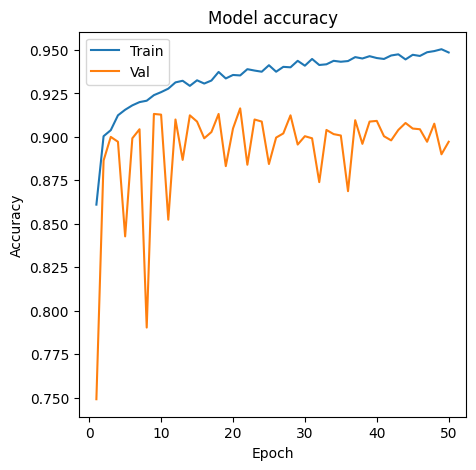

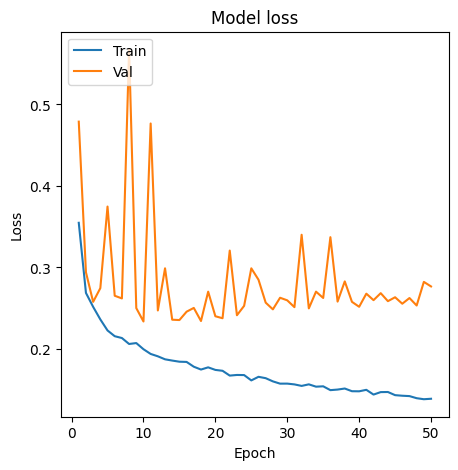

In [12]:
plot_learningCurve(history,50)

The model is **ovefitted**.To reduce overfiited we are using regularsiation methods.

Regularisation Methods

*Dropout

*L1 and L2

*Early Stopping

# **DROPOUT**

In [13]:
model1=Sequential()
initializer=tf.keras.initializers.GlorotUniform() #Xavier intialiser for weights
model1.add(Conv1D(64,2,activation='relu',kernel_initializer=initializer,input_shape=(100,1),use_bias=False))  #The filter (64)--the number of output filters in convention layer in CNN,kernal size=height*width
model1.add(Dropout(0.5))
model1.add(BatchNormalization())
model1.add(Dense(32,activation="relu"))
model1.add(Dropout(0.2))
model1.add(BatchNormalization())
model1.add(MaxPooling1D())
model1.add(Flatten())
model1.add(Dense(2,activation="softmax"))

In [14]:
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
history=model1.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test),verbose=0)

In [16]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 99, 64)            128       
                                                                 
 dropout (Dropout)           (None, 99, 64)            0         
                                                                 
 batch_normalization_2 (Bat  (None, 99, 64)            256       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 99, 32)            2080      
                                                                 
 dropout_1 (Dropout)         (None, 99, 32)            0         
                                                                 
 batch_normalization_3 (Bat  (None, 99, 32)            128       
 chNormalization)                                     

In [17]:
loss, accuracy =model1.evaluate(x_test, y_test)
print('Accuracy =', (accuracy*100))
print("Loss =",(loss*100))

79/79 [==============================] - 0s 4ms/step - loss: 0.2419 - accuracy: 0.9084
Accuracy = 90.83999991416931
Loss = 24.18893575668335


In [18]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  plt.figure(figsize=(5,5))
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.figure(figsize=(5,5))
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

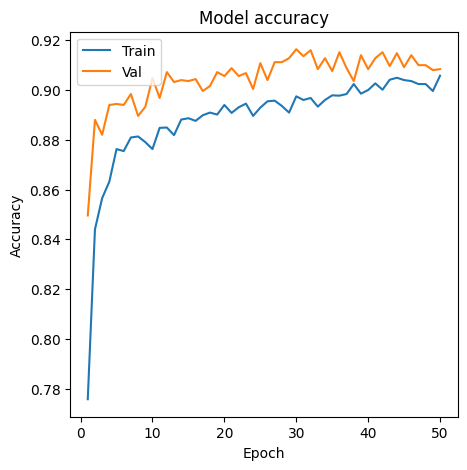

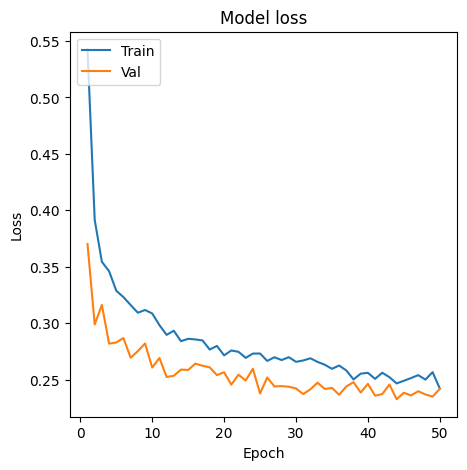

In [19]:
plot_learningCurve(history,50)

# **L1 and L2 Regularisation**

In [20]:
model2=Sequential()
initializer=tf.keras.initializers.GlorotUniform() #Xavier intialiser for weights
model2.add(Conv1D(64,2,activation='relu',kernel_initializer=initializer,input_shape=(100,1),kernel_regularizer =tf.keras.regularizers.l1( l=0.01),use_bias=False))  #The filter (64)--the number of output filters in convention layer in CNN,kernal size=height*width
model2.add(BatchNormalization())
model2.add(Dense(32,activation="relu"))
model2.add(BatchNormalization())
model2.add(MaxPooling1D())
model2.add(Flatten())
model2.add(Dense(2,activation="softmax"))

In [21]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [22]:
history=model2.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test),verbose=0)

In [23]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 99, 64)            128       
                                                                 
 batch_normalization_4 (Bat  (None, 99, 64)            256       
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 99, 32)            2080      
                                                                 
 batch_normalization_5 (Bat  (None, 99, 32)            128       
 chNormalization)                                                
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 49, 32)            0         
 g1D)                                                            
                                                      

In [24]:
loss, accuracy =model2.evaluate(x_test, y_test)
print('Accuracy =', (accuracy*100))
print("Loss =",(loss*100))

79/79 [==============================] - 0s 4ms/step - loss: 0.3097 - accuracy: 0.9020
Accuracy = 90.20000100135803
Loss = 30.97330629825592


In [25]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  plt.figure(figsize=(5,5))
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.figure(figsize=(5,5))
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

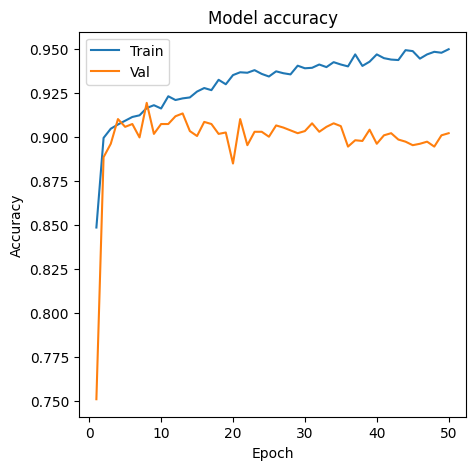

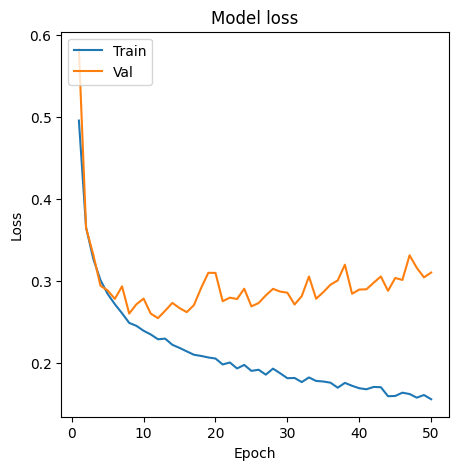

In [26]:
plot_learningCurve(history,50)

# **EARLY STOPPING**

In [27]:
model3=Sequential()
initializer=tf.keras.initializers.GlorotUniform() #Xavier intialiser for weights
model3.add(Conv1D(64,2,activation='relu',kernel_initializer=initializer,input_shape=(100,1),use_bias=False))  #The filter (64)--the number of output filters in convention layer in CNN,kernal size=height*width
model3.add(BatchNormalization())
model3.add(Dense(32,activation="relu"))
model3.add(BatchNormalization())
model3.add(MaxPooling1D())
model3.add(Flatten())
model3.add(Dense(2,activation="softmax"))
monitor_val_acc = EarlyStopping(monitor = 'val_loss', patience = 5)

In [28]:
model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [30]:
model3.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test),verbose=0)

In [31]:
loss, accuracy =model3.evaluate(x_test, y_test)
print('Accuracy =', (accuracy*100))
print("Loss =",(loss*100))

79/79 [==============================] - 1s 6ms/step - loss: 0.3043 - accuracy: 0.8980
Accuracy = 89.80000019073486
Loss = 30.42900562286377


In [32]:
model3.fit(x_train,y_train,epochs=50,batch_size=30)

Epoch 1/50
250/250 [==============================] - 2s 9ms/step - loss: 0.1304 - accuracy: 0.9531
Epoch 2/50
250/250 [==============================] - 2s 9ms/step - loss: 0.1326 - accuracy: 0.9529
Epoch 3/50
250/250 [==============================] - 3s 11ms/step - loss: 0.1290 - accuracy: 0.9547
Epoch 4/50
250/250 [==============================] - 3s 12ms/step - loss: 0.1298 - accuracy: 0.9509
Epoch 5/50
250/250 [==============================] - 2s 10ms/step - loss: 0.1269 - accuracy: 0.9501
Epoch 6/50
250/250 [==============================] - 2s 9ms/step - loss: 0.1263 - accuracy: 0.9552
Epoch 7/50
250/250 [==============================] - 2s 9ms/step - loss: 0.1230 - accuracy: 0.9572
Epoch 8/50
250/250 [==============================] - 3s 11ms/step - loss: 0.1245 - accuracy: 0.9516
Epoch 9/50
250/250 [==============================] - 3s 13ms/step - loss: 0.1236 - accuracy: 0.9536
Epoch 10/50
250/250 [==============================] - 2s 10ms/step - loss: 0.1220 - accuracy: 

In [33]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 99, 64)            128       
                                                                 
 batch_normalization_6 (Bat  (None, 99, 64)            256       
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 99, 32)            2080      
                                                                 
 batch_normalization_7 (Bat  (None, 99, 32)            128       
 chNormalization)                                                
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 49, 32)            0         
 g1D)                                                            
                                                      

In [34]:
data={"Parameters used":["Xavier Initialiser","Batch Normalisation","Conv1D with kernal size 2 & filter 64","Total number of NEURONS :34"],"Regularisation_Methods":["Without Regularisation","Dropout","L1 and L2 ","Early Stopping"],"Epochs":[50,50,50,50],"Optimizer used":["adam","adam","adam","adam"],"Loss":[38.38,31.522,38.067,38.20],"Accuracy":[86.79,88.040,87.319,86.91]}
df=pd.DataFrame(data)
df

,Parameters used,Regularisation_Methods,Epochs,Optimizer used,Loss,Accuracy
0,Xavier Initialiser,Without Regularisation,50,adam,38.380,86.790
1,Batch Normalisation,Dropout,50,adam,31.522,88.040
2,Conv1D with kernal size 2 & filter 64,L1 and L2,50,adam,38.067,87.319
3,Total number of NEURONS :34,Early Stopping,50,adam,38.200,86.910


# Therefore Dropuout Regularisation method gives less loss and high accuracy than other regularisation methods.

Using this model we can hypertune the parameters

# Hypertunning the model with Dropout regularisation to improve the accuracy and reduce the loss

In [39]:
!pip install tensorflow-keras-sklearn

ERROR: Could not find a version that satisfies the requirement tensorflow-keras-sklearn (from versions: none)
ERROR: No matching distribution found for tensorflow-keras-sklearn


In [36]:
from tensorflow.keras import activations
def build_classifer(optimizer,kernel_initializer,dropout,loss,learning_rate=0.001):
  model1=Sequential()
   #Xavier intialiser for weights
  model1.add(Conv1D(64,2,activation='relu',kernel_initializer=kernel_initializer,input_shape=(100,1),use_bias=False))  #The filter (64)--the number of output filters in convention layer in CNN,kernal size=height*width
  model1.add(Dropout(0.5))
  model1.add(BatchNormalization())
  model1.add(Dense(32,activation="relu"))
  model1.add(Dropout(0.2))
  model1.add(BatchNormalization())
  model1.add(MaxPooling1D())
  model1.add(Flatten())
  model1.add(Dense(2,activation="softmax"))
  model1.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model1
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
model=KerasClassifier(build_fn=build_classifer,verbose=0,epochs=50)
kernel_initializer=['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
optimizer= ["Adam","Adagrad","sgd"]
loss= ["binary_crossentropy","mean_squared_error","mean_absolute_error"]
dropout= [0, 0.40, 0.8]
params = dict(optimizer=optimizer,kernel_initializer=kernel_initializer,dropout=dropout,loss=loss)

ModuleNotFoundError: No module named 'tensorflow.keras.wrappers'

In [ ]:
# Install the missing module
!pip install tensorflow-keras-sklearn

# Import the required module
from tensorflow_keras_sklearn import KerasClassifier

# Define the model building function
def build_classifier(optimizer, kernel_initializer, dropout, loss, learning_rate=0.001):
    model = Sequential()
    # Xavier initializer for weights
    model.add(Conv1D(64, 2, activation='relu', kernel_initializer=kernel_initializer, input_shape=(100, 1), use_bias=False))  # The filter (64)--the number of output filters in convention layer in CNN, kernal size=height*width
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(32, activation="relu"))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(MaxPooling1D())
    model.add(Flatten())
    model.add(Dense(2, activation="softmax"))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the KerasClassifier object
model = KerasClassifier(build_fn=build_classifier, verbose=0, epochs=50)

# Define the parameters for grid search
kernel_initializer = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
optimizer = ["Adam", "Adagrad", "sgd"]
loss = ["binary_crossentropy", "mean_squared_error", "mean_absolute_error"]


In [38]:
# Install the missing module
!pip install tensorflow-keras-sklearn

# Import the required module
from tensorflow_keras_sklearn import KerasClassifier

# Define the model building function
def build_classifier(optimizer, kernel_initializer, dropout, loss, learning_rate=0.001):
    model = Sequential()
    # Xavier initializer for weights
    model.add(Conv1D(64, 2, activation='relu', kernel_initializer=kernel_initializer, input_shape=(100, 1), use_bias=False))  # The filter (64)--the number of output filters in convention layer in CNN, kernal size=height*width
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(32, activation="relu"))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(MaxPooling1D())
    model.add(Flatten())
    model.add(Dense(2, activation="softmax"))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the KerasClassifier object
model = KerasClassifier(build_fn=build_classifier, verbose=0, epochs=50)

# Define the parameters for grid search
kernel_initializer = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
optimizer = ["Adam", "Adagrad", "sgd"]
loss = ["binary_crossentropy", "mean_squared_error", "mean_absolute_error"]


ERROR: Could not find a version that satisfies the requirement tensorflow-keras-sklearn (from versions: none)
ERROR: No matching distribution found for tensorflow-keras-sklearn


ModuleNotFoundError: No module named 'tensorflow_keras_sklearn'

In [37]:
# Install the missing module
!pip install tensorflow-keras-sklearn

# Import the required module
from tensorflow_keras_sklearn import KerasClassifier

# Define the model building function
def build_classifier(optimizer, kernel_initializer, dropout, loss, learning_rate=0.001):
    model = Sequential()
    # Xavier initializer for weights
    model.add(Conv1D(64, 2, activation='relu', kernel_initializer=kernel_initializer, input_shape=(100, 1), use_bias=False))  # The filter (64)--the number of output filters in convention layer in CNN, kernal size=height*width
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(32, activation="relu"))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(MaxPooling1D())
    model.add(Flatten())
    model.add(Dense(2, activation="softmax"))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the KerasClassifier object
model = KerasClassifier(build_fn=build_classifier, verbose=0, epochs=50)

# Define the parameters for grid search
kernel_initializer = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
optimizer = ["Adam", "Adagrad", "sgd"]
loss = ["binary_crossentropy", "mean_squared_error", "mean_absolute_error"]


ERROR: Could not find a version that satisfies the requirement tensorflow-keras-sklearn (from versions: none)
ERROR: No matching distribution found for tensorflow-keras-sklearn


ModuleNotFoundError: No module named 'tensorflow_keras_sklearn'

In [ ]:
from sklearn.model_selection import GridSearchCV
gs=GridSearchCV(estimator=model, param_grid=params,scoring='accuracy',n_jobs=-1, cv=10)
gs = gs.fit(x_train, y_train)

In [ ]:
best_params=gs.best_params_
best_params

In [ ]:
decay_rate=0.01
learning_rate=0.001
epochs=100
def exp_decay(epoch):
  lrate=learning_rate*np.exp(-decay_rate*epochs)
  return lrate

loss_history=History()
lr_rate=LearningRateScheduler(exp_decay)
callback_list=[loss_history,lr_rate]
exponential_decay_model_history=model1.fit(x_train,y_train,epochs=epochs,callbacks=callback_list,verbose=1,validation_data=(x_test,y_test))